In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
  tesseract-ocr-ind
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 536 kB of archives.
After this operation, 1,138 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-ind all 4.00~git24-0e00fe6-1

In [ ]:
import seaborn as sns
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
import pytesseract

In [ ]:
model = tf.keras.models.load_model('/content/my_model.h5')

In [ ]:
def readImg(img):
    img=cv2.imread(img,0)
    
    return img
def deleteFile(path):
  dir=os.listdir(path)
  for filename in dir:
    try:
      os.remove(dir_path+filename)  
    except OSError as e:
      print("no file")

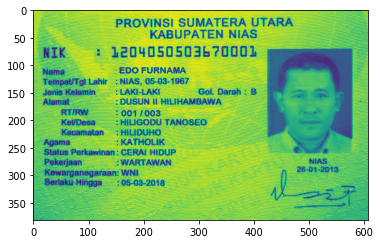

In [ ]:
img=readImg('/content/ktp5.png')
plt.imshow(img)
ret,img=cv2.threshold(img,150,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU,img)
img=cv2.resize(img,(512,512))
img= np.expand_dims(img,axis=-1)
img=img/255
img=np.expand_dims(img,axis=0)

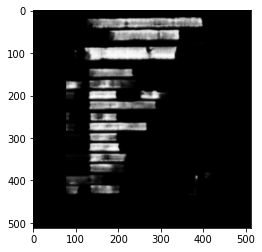

In [ ]:
pred=model.predict(img)
pred=np.squeeze(np.squeeze(pred,axis=0),axis=-1)
plt.imshow(pred,cmap='gray')

In [ ]:
plt.imsave('test_img_mask.JPG',pred)

In [ ]:
dir='test1'
file_path='/content/'
dir_path=os.path.join(file_path+dir+'/')

if not os.path.exists(os.path.join(file_path,dir)):
  os.mkdir(file_path+dir)

True

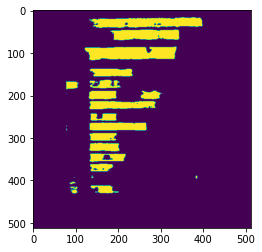

In [ ]:
coordinates=[]
img = cv2.imread('/content/test_img_mask.JPG',0) 
cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU,img)
ori_img=cv2.imread('/content/ktp5.png')
ori_img=cv2.resize(ori_img,(512,512))
contours, hier = cv2.findContours(img, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
i=0
for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    # draw a white rectangle to visualize the bounding rect
    cv2.rectangle(ori_img, (x, y), (x+w,y+h), 255, 1)
    # coordinates.append((x,y,(x+w),(y+h)))
    if(w>15 and h>15):
      new=ori_img[y:y+h,x:x+w]
      cv2.imwrite('/content/test1/test_{}.png'.format(i),new)
      i+=1
    
cv2.drawContours(img, contours, 1, (512, 512, 1), 1)
plt.imshow(img)
cv2.imwrite("output.png",ori_img)

In [ ]:
# pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

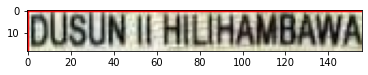

In [ ]:
text_list=[]
img=cv2.imread('/content/test1/test_8.png')
plt.imshow(img)
list_crop=os.listdir(dir_path)
for filename in list_crop:
  # print(filename)
  t1 = pytesseract.image_to_string(dir_path+filename,lang='ind',
                                    config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789')
  text_list.append(t1)

In [ ]:
# deleteFile(dir_path)
print(text_list)
unwanted_text="|!@#$%^&*()+<>?:;'][{}]"
new_sentences=[]
textfile = open("readme.txt", "w")
for i in text_list:
  for j in i:
    if i not in unwanted_text:
      new_sentences.append(i)
      print(new_sentences)
  textfile.write(i)
textfile.close()


['12010505035 70001\n\x0c', 'FDO FURNAMA\n\x0c', 'HILIGODU TANOSEO\n\x0c', 'DUSUN |! HILIHAMBAWA\n\x0c', 'PROVINSI SUMATERA UTARA\n\x0c', 'LAKI-LAKI\n\x0c', 'NIAS, 05-03\n\x0c', 'KATHOLIK\n\x0c', 'HILIDUHO\n\x0c', 'jga\n\x0c', 'CERAI HIDUP\n\x0c', '| Lah\n\x0c', 'KABUPATEN NIAS\n\x0c', 'Gol. Dai\n\x0c', 'WARTAV\n\x0c', '05-03-2018\n\x0c', '001 /003\n\x0c']
['12010505035 70001\n\x0c']
['12010505035 70001\n\x0c', '12010505035 70001\n\x0c']
['12010505035 70001\n\x0c', '12010505035 70001\n\x0c', '12010505035 70001\n\x0c']
['12010505035 70001\n\x0c', '12010505035 70001\n\x0c', '12010505035 70001\n\x0c', '12010505035 70001\n\x0c']
['12010505035 70001\n\x0c', '12010505035 70001\n\x0c', '12010505035 70001\n\x0c', '12010505035 70001\n\x0c', '12010505035 70001\n\x0c']
['12010505035 70001\n\x0c', '12010505035 70001\n\x0c', '12010505035 70001\n\x0c', '12010505035 70001\n\x0c', '12010505035 70001\n\x0c', '12010505035 70001\n\x0c']
['12010505035 70001\n\x0c', '12010505035 70001\n\x0c', '12010505035 